In [3]:
#IMPORTATION OF THE NECCESSARY LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [13]:
#LOAD DATA INTO PYTHON
# Use raw strings or forward slashes
historical_energy_data = pd.read_csv(r'C:\Users\Admin\Downloads\historical_energy_data.csv')
infrastructure_data = pd.read_csv(r'C:\Users\Admin\Downloads\infrastructure_data.csv')
market_data = pd.read_csv(r'C:\Users\Admin\Downloads\market_data.csv')
regulatory_data = pd.read_csv(r'C:\Users\Admin\Downloads\regulatory_data.csv')

In [150]:
historical_energy_data.head()

,Date/Time,Location/Region,Energy Source,Energy Demand,Energy Consumption (kWh),Energy Price,Operational Costs,Energy Production (kWh),Year,Month,Year-Month
0,2012-01-01,Region A,Fossil Fuels,24016,21848,0.131630,1564.239198,31604,2012,1,2012-01
1,2012-01-02,Region C,Fossil Fuels,56200,34796,0.160969,3837.295411,11734,2012,1,2012-01
2,2012-01-03,Region A,Renewables,81268,36244,0.155890,4418.260676,31523,2012,1,2012-01
3,2012-01-04,Region C,Fossil Fuels,61287,19955,0.130128,3743.417970,21205,2012,1,2012-01
4,2012-01-05,Region B,Fossil Fuels,93447,13788,0.151835,1071.513936,19548,2012,1,2012-01


In [17]:
infrastructure_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,01/01/2012,Poor,Repairs,High
1,02/01/2012,Poor,Upgrades,High
2,03/01/2012,Fair,Upgrades,High
3,04/01/2012,Poor,Repairs,High
4,05/01/2012,Poor,Repairs,High


In [19]:
market_data.head()

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518
1,2012-01-02,0.151762,Medium,Upward,2115
2,2012-01-03,0.241443,High,Stable,22353
3,2012-01-04,0.071104,Low,Downward,25482
4,2012-01-05,0.107281,High,Stable,20264


In [21]:
regulatory_data.head()

,Date/Time,Regulatory Changes,Compliance Status,Compliance Costs
0,2012-01-01,New Regulation,Compliant,3281.685306
1,2012-01-02,Amendment,Non-compliant,2037.272281
2,2012-01-03,Amendment,Non-compliant,629.891778
3,2012-01-04,New Regulation,Non-compliant,2277.898351
4,2012-01-05,Amendment,Non-compliant,4687.163688


DATA CLEANING

In [96]:
# Define date format
date_format = "%d/%m/%Y"

# Convert the 'Date/Time' column to datetime using the correct format
historical_energy_data['Date/Time'] = pd.to_datetime(historical_energy_data['Date/Time'], format=date_format)

# Define the new date format
new_date_format = "%Y/%m/%d"

# Format the 'Date/Time' column to the new date format
historical_energy_data['Date/Time'] = pd.to_datetime(historical_energy_data['Date/Time'].dt.strftime(new_date_format))


In [154]:
# Display the updated dataframe
historical_energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date/Time                 1000 non-null   datetime64[ns]
 1   Location/Region           1000 non-null   object        
 2   Energy Source             1000 non-null   object        
 3   Energy Demand             1000 non-null   int64         
 4   Energy Consumption (kWh)  1000 non-null   int64         
 5   Energy Price              1000 non-null   float64       
 6   Operational Costs         1000 non-null   float64       
 7   Energy Production (kWh)   1000 non-null   int64         
 8   Year                      1000 non-null   int32         
 9   Month                     1000 non-null   int32         
 10  Year-Month                1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(2), period[M](1)
memor

In [112]:

# Define date format
date_format = "%Y/%m/%d"

# Convert the 'Date/Time' column to datetime using the correct format
infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'], format=date_format)

# Define the new date format
new_date_format = "%Y/%m/%d"

# Format the 'Date/Time' column to the new date format
infrastructure_data['Date/Time'] = pd.to_datetime(infrastructure_data['Date/Time'].dt.strftime(new_date_format))



In [118]:
infrastructure_data.head()

,Date/Time,Infrastructure Status,Maintenance Activities,Technology Limitations
0,2012-01-01,Poor,Repairs,High
1,2012-01-02,Poor,Upgrades,High
2,2012-01-03,Fair,Upgrades,High
3,2012-01-04,Poor,Repairs,High
4,2012-01-05,Poor,Repairs,High


In [120]:
# Define date format
date_format = "%Y/%m/%d"

# Convert the 'Date/Time' column to datetime using the correct format
market_data['Date/Time'] = pd.to_datetime(market_data['Date/Time'], format=date_format)

# Define the new date format
new_date_format = "%Y/%m/%d"

# Format the 'Date/Time' column to the new date format
market_data['Date/Time'] = pd.to_datetime(market_data['Date/Time'].dt.strftime(new_date_format))


In [124]:
# Display the first few rows to check the current date format
market_data.head(1)

,Date/Time,Market Price,Competitor Data,Market Trends,Market Demand
0,2012-01-01,0.167891,High,Upward,13518


In [126]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date/Time        1000 non-null   datetime64[ns]
 1   Market Price     1000 non-null   float64       
 2   Competitor Data  1000 non-null   object        
 3   Market Trends    1000 non-null   object        
 4   Market Demand    1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


In [136]:
date_format = "%Y-%m-%d"

# Convert the 'Date/Time' column to datetime using the correct format
regulatory_data['Date/Time'] = pd.to_datetime(regulatory_data['Date/Time'], format=date_format)

# If you want to create a new column with the date in a specific string format
new_date_format = "%Y/%m/%d"
regulatory_data['Formatted_Date'] = regulatory_data['Date/Time'].dt.strftime(new_date_format)


In [138]:
regulatory_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date/Time           1000 non-null   datetime64[ns]
 1   Regulatory Changes  1000 non-null   object        
 2   Compliance Status   1000 non-null   object        
 3   Compliance Costs    1000 non-null   float64       
 4   Formatted_Date      1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 39.2+ KB


EXPLORATORY DATA ANALYSIS

In [77]:
# Group all datasets as a dictionary
datasets = {
    "historical_energy_data": historical_energy_data,
    "infrastructure_data": infrastructure_data,
    "market_data": market_data,
    "regulatory_data": regulatory_data
}

# Define the categorical columns for each dataset
categorical_columns = {
    "historical_energy_data": ["Location/Region", "Energy Source"],
    "infrastructure_data": ["Infrastructure Status", "Maintenance Activities", "Technology Limitations"],
    "market_data": ["Competitor Data", "Market Trends"],
    "regulatory_data": ["Regulatory Changes", "Compliance Status"]
}

# Extract unique values and their counts for categorical columns
categorical_values_counts = {}
for dataset, columns in categorical_columns.items():
    for column in columns:
        categorical_values_counts[(dataset, column)] = datasets[dataset][column].value_counts()



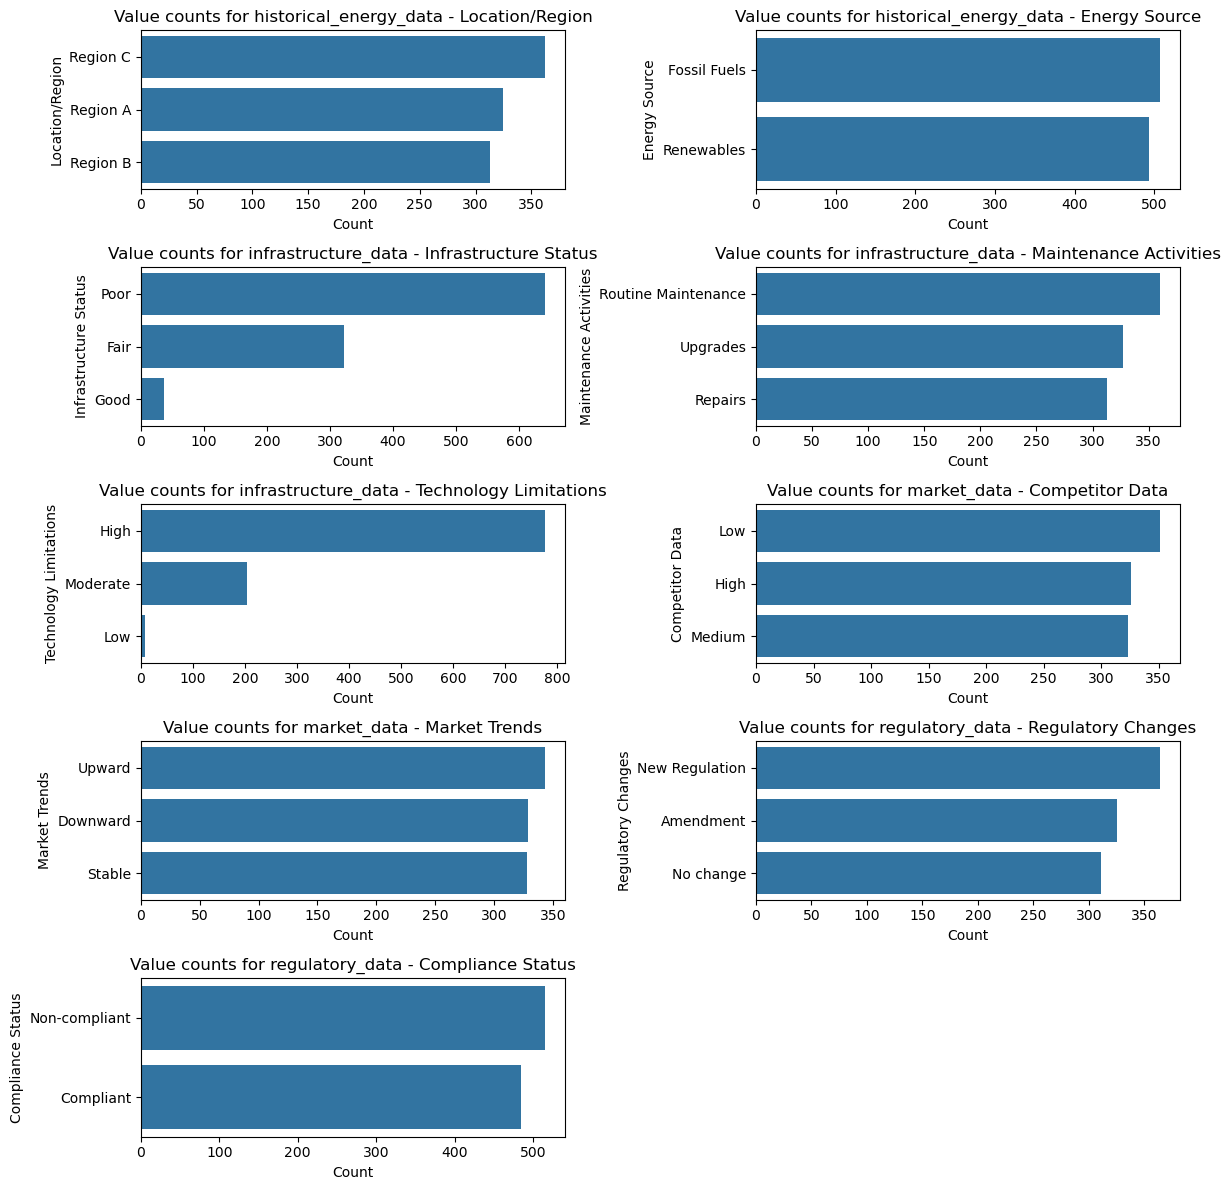

In [83]:
#VISUALIZING 
# Calculate the number of rows and columns for the subplots
num_rows = (len(categorical_values_counts) + 1) // 2
num_cols = 2

# Create a grid of the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Define a color palette
palette = sns.color_palette("viridis", as_cmap=True)

# Iterate through categorical columns and plot them in subplots
for i, ((dataset, column), counts) in enumerate(categorical_values_counts.items()):
    ax = axes[i]
    sns.barplot(x=counts.values, y=counts.index, ax=ax)
    ax.set_title(f"Value counts for {dataset} - {column}")
    ax.set_xlabel("Count")
    ax.set_ylabel(column)

# Hide any remaining empty subplots
for i in range(len(categorical_values_counts), num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust plot
plt.tight_layout()

# Show plot
plt.show()


ENERGY DEMAND , PRODUCTION, AND CONSUMPTION OVER TIME 
start by examining the trends in energy demand , production and consumption from the historical energy data dataset
this will give inghists into fluctuations and potential vulnerabilities in the energy market

In [181]:

# Ensure columns are numeric
# Convert int64 columns to float64
df['Energy Production (kwh)'] = df['Energy Production (kwh)'].astype(float)
df['Energy Consumption (kwh)'] = df['Energy Consumption (kwh)'].astype(float)
df['Energy Demand'] = df['Energy Demand'].astype(float)

In [183]:
historical_energy_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date/Time                 1000 non-null   datetime64[ns]
 1   Location/Region           1000 non-null   object        
 2   Energy Source             1000 non-null   object        
 3   Energy Demand             1000 non-null   int64         
 4   Energy Consumption (kWh)  1000 non-null   int64         
 5   Energy Price              1000 non-null   float64       
 6   Operational Costs         1000 non-null   float64       
 7   Energy Production (kWh)   1000 non-null   int64         
 8   Year                      1000 non-null   int32         
 9   Month                     1000 non-null   int32         
 10  Year-Month                1000 non-null   period[M]     
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(2), period[M](1)
memor

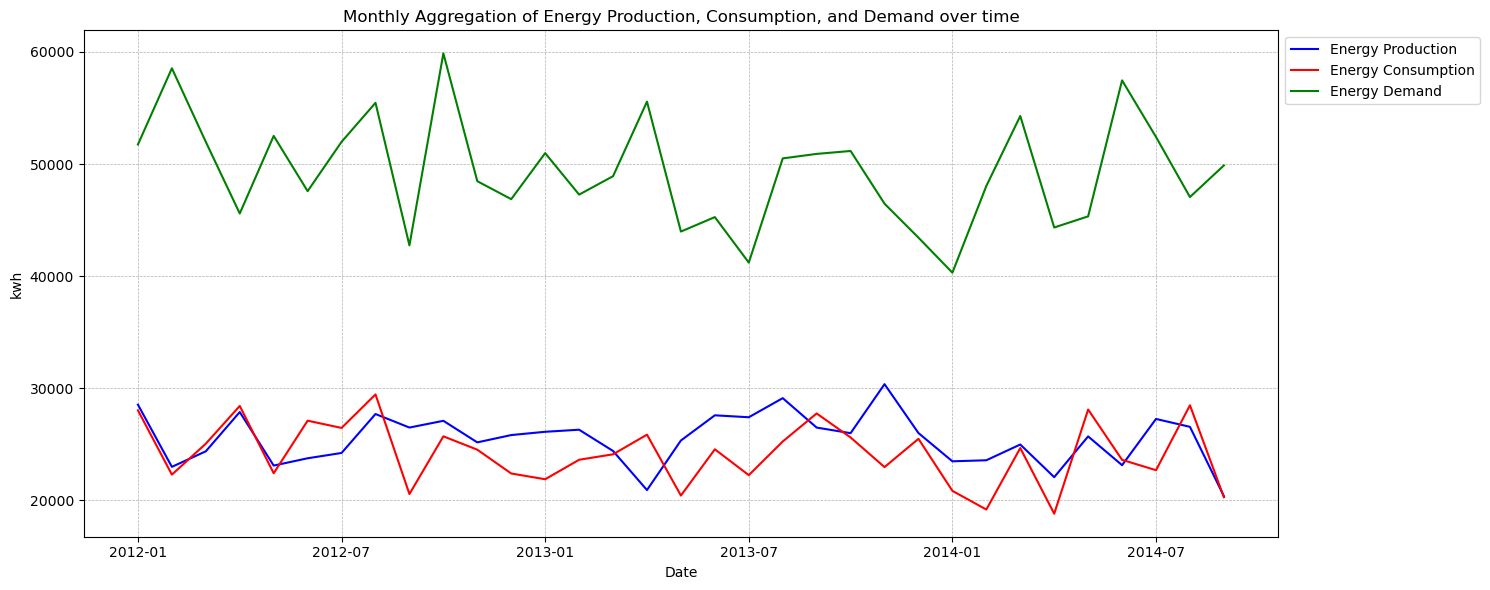

In [189]:

# Extract year and month
historical_energy_data['Year'] = historical_energy_data['Date/Time'].dt.year
historical_energy_data['Month'] = historical_energy_data['Date/Time'].dt.month

# Create a new column 'Year-Month' for easy plotting
historical_energy_data['Year-Month'] = historical_energy_data['Date/Time'].dt.to_period('M')

# Filter numeric columns
numeric_columns = historical_energy_data.select_dtypes(include=['number']).columns

# Aggregating data on a monthly basis
monthly_data = historical_energy_data.groupby('Year-Month')[numeric_columns].mean()

# Setting figsize
plt.figure(figsize=(15, 6))# Plotting
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Production (kWh)', label='Energy Production', color="blue", linestyle='-', linewidth=1.5)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Consumption (kWh)', label='Energy Consumption', color="red", linestyle='-', linewidth=1.5)
sns.lineplot(data=monthly_data, x=monthly_data.index.astype(str), y='Energy Demand', label='Energy Demand', color="green", linestyle='-', linewidth=1.5)

# Setting title and labels
plt.title('Monthly Aggregation of Energy Production, Consumption, and Demand over time')
plt.xlabel('Date')
plt.ylabel('kwh')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting xticks labels
labels = monthly_data.index.astype(str).tolist()
n = 6
plt.xticks(labels[::n], rotation=360)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)

plt.show()

MARKET PRICE AND ENERY PRICE OVER TIME 

to understand the pricing dynamics and its relation to market trends

visulization of the market data dataset alongside the energy price from the historical data dataset over time

C:\Users\Admin\AppData\Local\Temp\ipykernel_7976\2312705038.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price', color="blue", linestyle='-', linewidth=1.5, ci =None)
C:\Users\Admin\AppData\Local\Temp\ipykernel_7976\2312705038.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price', color="yellow", linestyle='-', linewidth=1.5, ci =None)


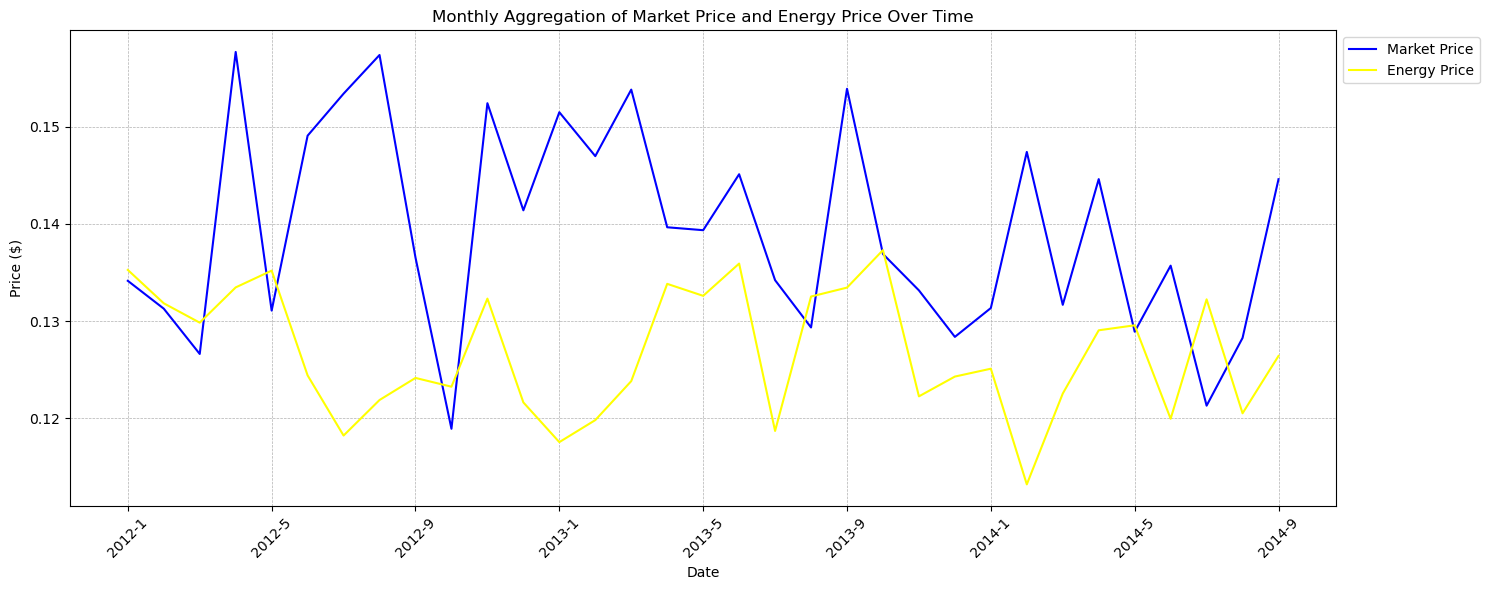

In [205]:
# Merging historical energy data dataset on DateTime for combined analysis
merged_data = pd.merge(historical_energy_data, market_data, on="Date/Time", how="inner")

# Setting DateTime as the index of the DataFrame for aggregation
merged_data['Year'] = merged_data['Date/Time'].dt.year
merged_data['Month'] = merged_data['Date/Time'].dt.month

# Selecting only numeric columns for aggregation
numeric_columns = merged_data.select_dtypes(include=['number']).columns
monthly_merged_data = merged_data.groupby(['Year', 'Month'])[numeric_columns].mean()

# Create a new year-month column for plotting
monthly_merged_data['Year-Month'] = monthly_merged_data.index.get_level_values(0).astype(str) + '-' + monthly_merged_data.index.get_level_values(1).astype(str)

# Plotting
plt.figure(figsize=(15, 6))

sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Market Price', label='Market Price', color="blue", linestyle='-', linewidth=1.5, ci =None)
sns.lineplot(data=monthly_merged_data, x='Year-Month', y='Energy Price', label='Energy Price', color="yellow", linestyle='-', linewidth=1.5, ci =None)

plt.title('Monthly Aggregation of Market Price and Energy Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting xticks labels
labels = monthly_merged_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.show()


ANALYZING COMPETITION FROM RENEWABLE ENERGY PROVIDERS

to understand the competition from renewable energy production and its impact on energy enterprise analyze the energy source column from the historical energy data dataset

visulize the trends in energy production based on the energy source

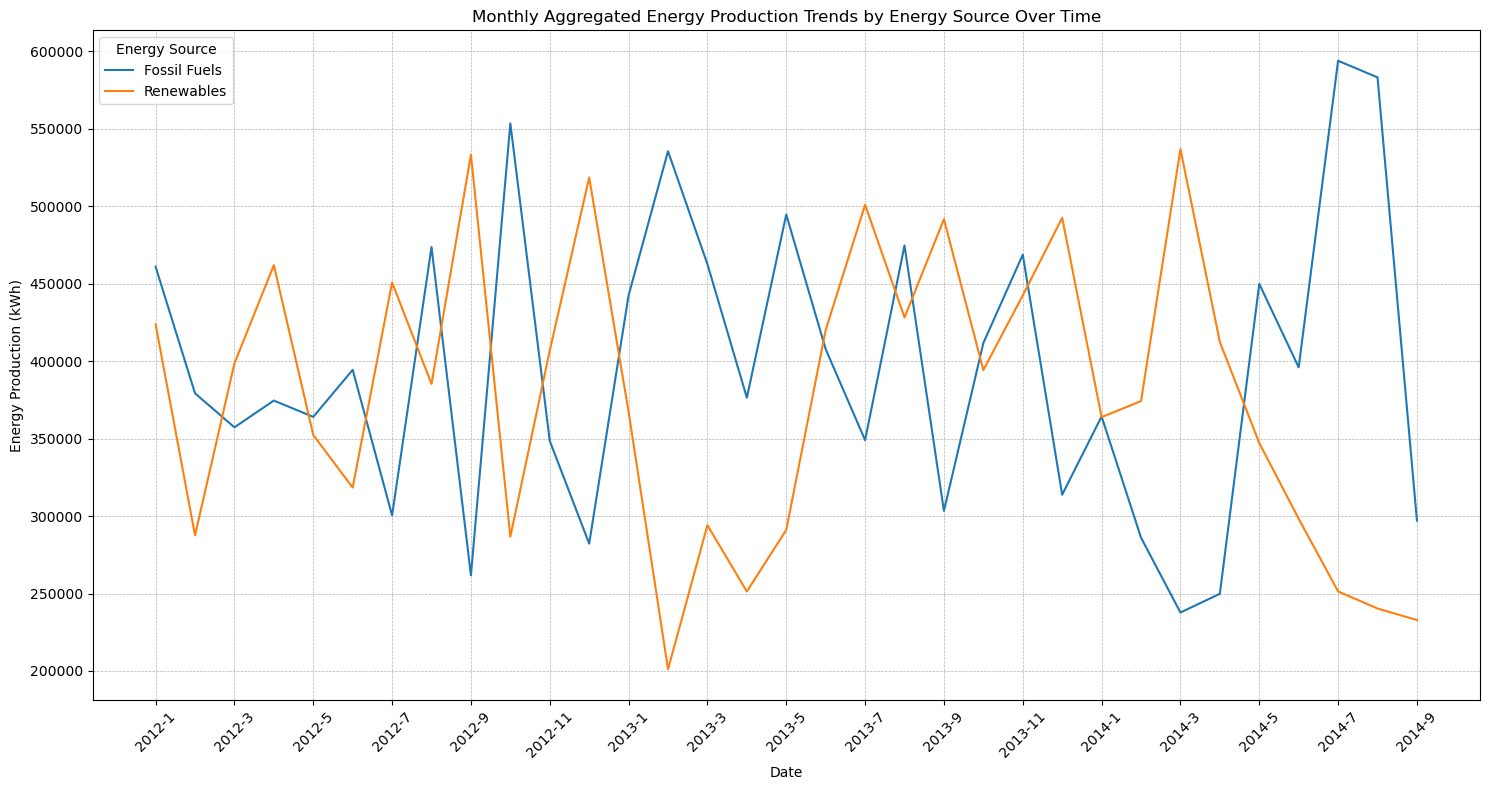

In [214]:
# Adding Year and Month columns to historical_energy_data
historical_energy_data['Year'] = historical_energy_data['Date/Time'].dt.year
historical_energy_data['Month'] = historical_energy_data['Date/Time'].dt.month

# Aggregating data on a monthly basis by Energy Source
monthly_aggregated_data = historical_energy_data.groupby(['Year', 'Month', 'Energy Source'])['Energy Production (kWh)'].sum().reset_index()

# Creating a new Year-Month column for plotting
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Plotting
plt.figure(figsize=(15, 8))
sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Energy Production (kWh)', hue='Energy Source')

plt.title('Monthly Aggregated Energy Production Trends by Energy Source Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Production (kWh)')
plt.legend(title='Energy Source')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting xticks labels
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.show()



infrastructure status and technology limitations 

to understand the state of  the infrastructure and technology over time

visualize the frequency of various infrastructure values and the distribution of technology limitations from the infrastructure_data dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_7976\4194928425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0], order=['Good', 'Fair', 'Poor'], palette='viridis')
C:\Users\Admin\AppData\Local\Temp\ipykernel_7976\4194928425.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1], palette='viridis')


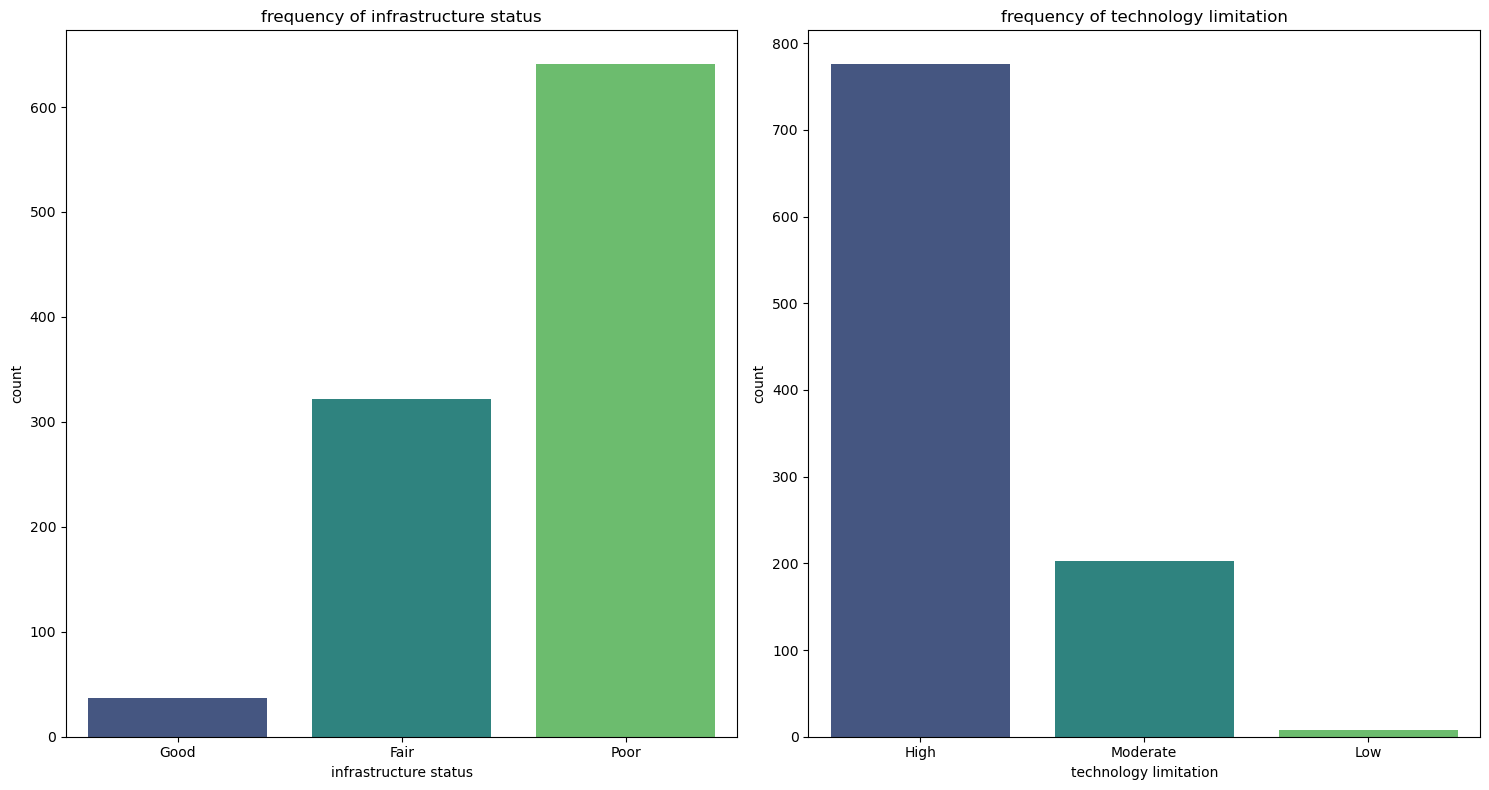

In [221]:
#setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15,8))

#plotting the frequency of the infrastructure status

sns.countplot(data=infrastructure_data, x='Infrastructure Status', ax=axes[0], order=['Good', 'Fair', 'Poor'], palette='viridis')
axes[0].set_title('frequency of infrastructure status')
axes[0].set_xlabel('infrastructure status')
axes[0].set_ylabel('count')

#plotting the frequency of the technology limitation

sns.countplot(data=infrastructure_data, x='Technology Limitations', ax=axes[1], palette='viridis')
axes[1].set_title('frequency of technology limitation')
axes[1].set_xlabel('technology limitation')
axes[1].set_ylabel('count')

plt.tight_layout()
plt.show()

relationship with infrastructure status and technology limitation

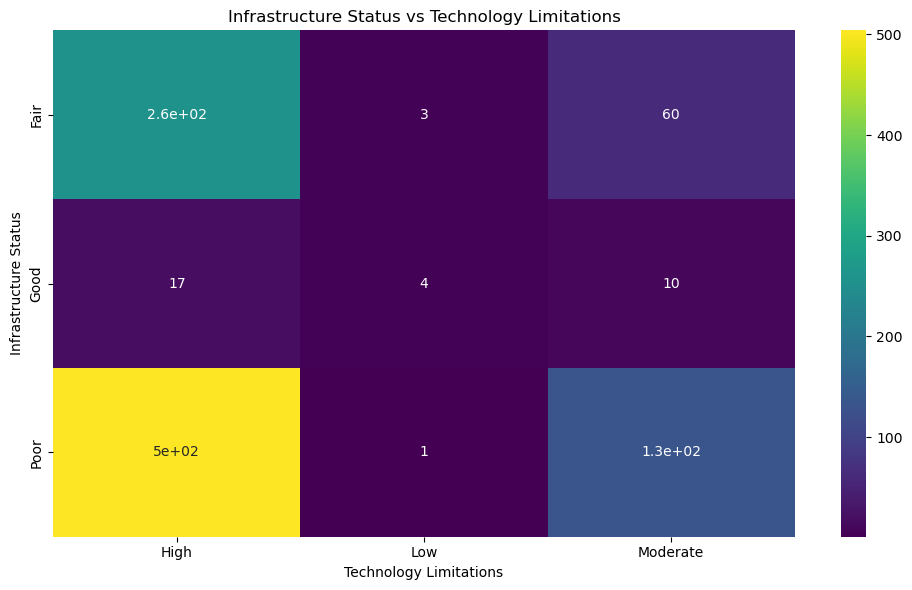

In [230]:
ct = pd.crosstab(infrastructure_data['Infrastructure Status'], infrastructure_data['Technology Limitations'])

plt.figure(figsize=(10, 6))

sns.heatmap(ct, annot = True, cmap = 'viridis')
plt.title('Infrastructure Status vs Technology Limitations')
plt.xlabel('Technology Limitations')
plt.ylabel('Infrastructure Status')

plt.tight_layout()
plt.show()

CORRELATION BETWEEN POOR INFRASTRUCTURE STATUS AND HIGH TECHNOLOGY LIMITATION AND THE ENERGY PRODUCTION 

In [249]:
infrastructure_data['Poor_Infrastructure'] = infrastructure_data['Infrastructure Status'].apply(lambda x: 1 if x =='Poor' else 0)
infrastructure_data['High_Tech_Limitations'] = infrastructure_data['Technology Limitations'].apply(lambda x: 1 if x == 'High' else 0)

infrastructure_data['Combined'] = infrastructure_data['Poor_Infrastructure'] * infrastructure_data['High_Tech_Limitations']

merged_data = pd.merge(historical_energy_data, infrastructure_data, on = "Date/Time", how = "inner")
correlation_coefficient = merged_data['Energy Production (kWh)'].corr(merged_data['Combined'])

In [251]:
correlation_coefficient

-0.015877155348918304

regulatory changes and compliance costs

to understand the impact of regulatory changes 

visualize the frequency of variious regulatory changes and the distribution of compliance cost associated with the changes fromthe regulatory dataset

C:\Users\Admin\AppData\Local\Temp\ipykernel_7976\1439405666.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=regulatory_data, x='Regulatory Changes', ax=ax1, palette='viridis')


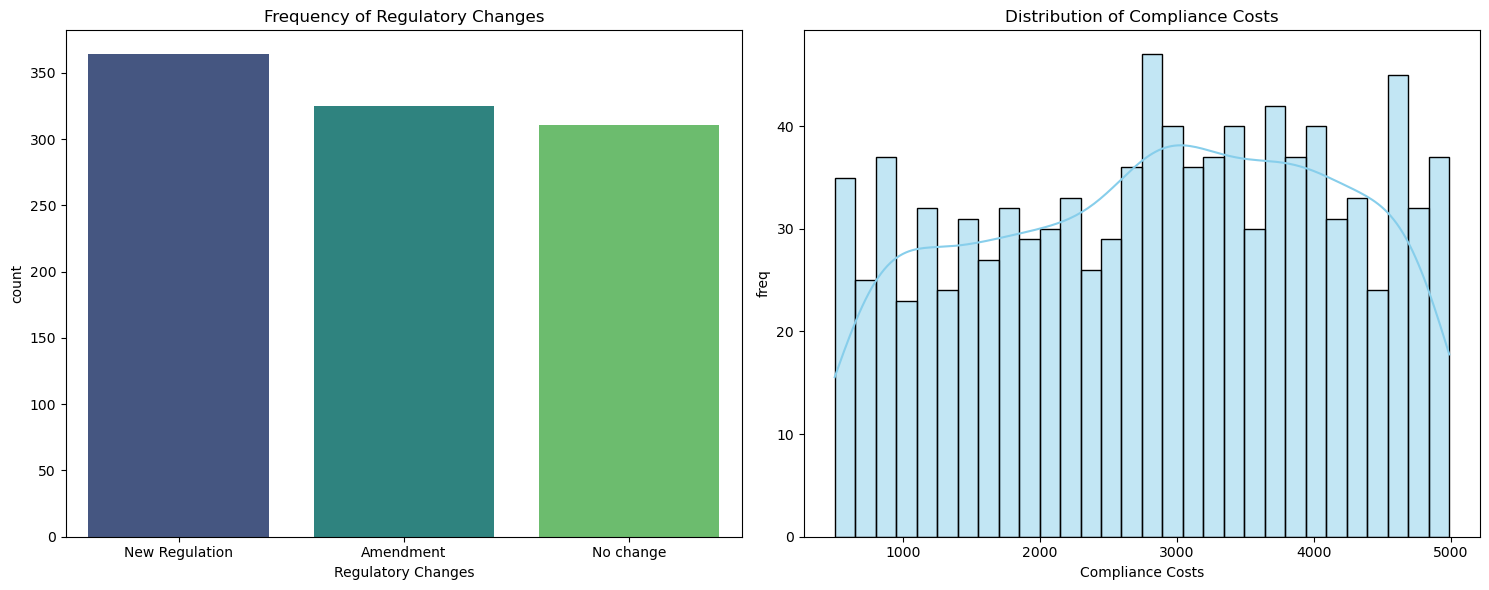

In [256]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=regulatory_data, x='Regulatory Changes', ax=ax1, palette='viridis')
ax1.set_title('Frequency of Regulatory Changes')
ax1.set_xlabel('Regulatory Changes')
ax1.set_ylabel('count')

sns.histplot(data=regulatory_data, x='Compliance Costs', ax=ax2, bins=30, kde=True, color='skyblue')
ax2.set_title('Distribution of Compliance Costs')
ax2.set_xlabel('Compliance Costs')
ax2.set_ylabel('freq')

plt.tight_layout()
plt.show()

impact of regulatory changes and oprational cost on revenue

visulize the relationship between regulatory changes and the associated compliance cost to the revenue generated from the company 

revenue = energy consumption * energy price

provide insights into the financial implications of regulatory changes cost and of energy enterprise

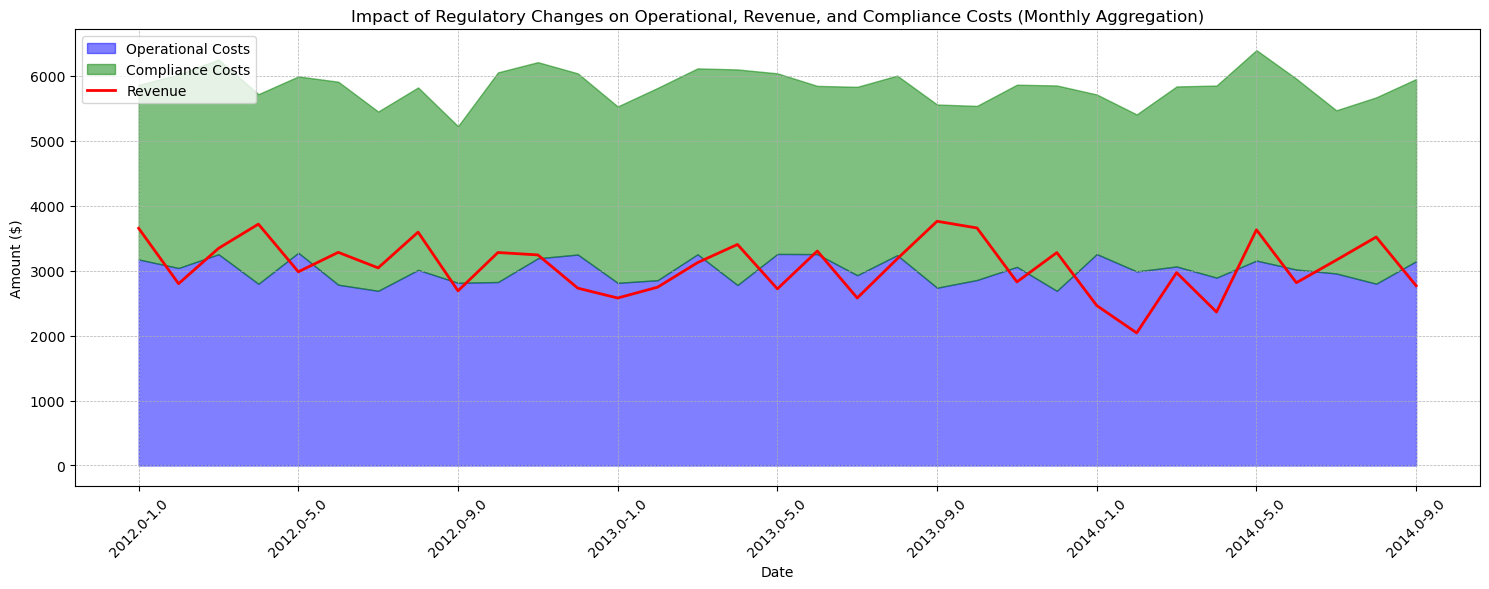

In [297]:
# Calculate Revenue
historical_energy_data['Revenue'] = historical_energy_data['Energy Price'] * historical_energy_data['Energy Consumption (kWh)']

# Merge with regulatory data
merged_regulatory_data = pd.merge(historical_energy_data, regulatory_data, on="Date/Time", how="inner")

# Add Year and Month columns
merged_regulatory_data['Year'] = merged_regulatory_data['Date/Time'].dt.year
merged_regulatory_data['Month'] = merged_regulatory_data['Date/Time'].dt.month

# Aggregate data on a monthly basis
monthly_aggregated_data = merged_regulatory_data.groupby('Year-Month')[numeric_columns].mean().reset_index()

# Create a new Year-Month column for plotting
monthly_aggregated_data['Year-Month'] = monthly_aggregated_data['Year'].astype(str) + '-' + monthly_aggregated_data['Month'].astype(str)

# Plotting
plt.figure(figsize=(15, 6))
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], color='blue', label='Operational Costs', alpha=0.5)
plt.fill_between(monthly_aggregated_data['Year-Month'], monthly_aggregated_data['Operational Costs'], 
                 monthly_aggregated_data['Operational Costs'] + monthly_aggregated_data['Compliance Costs'], 
                 color='green', label='Compliance Costs', alpha=0.5)

sns.lineplot(data=monthly_aggregated_data, x='Year-Month', y='Revenue', label='Revenue', color='red', linewidth=2)

plt.title('Impact of Regulatory Changes on Operational, Revenue, and Compliance Costs (Monthly Aggregation)')
plt.xlabel('Date')
plt.ylabel('Amount ($)')
plt.legend(loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Set xticks labels
labels = monthly_aggregated_data['Year-Month'].tolist()
n = 4
plt.xticks(labels[::n], rotation=45)

plt.tight_layout()
plt.show()


analyzing competition from renueable energy providers

understand the competition from renewable energy providers and its impact on the energix enterprise analyze the energy source column from the historical dataset

visulise the trend in energy production based on the energy source over time

General Insights:
1. Dynamic Energy Landscape: Energix Enterprise experiences marked variances in energy production, consumption, and demand patterns. There are distinct periods where the demand overshadows production, highlighting potential areas of concern in market stability and supply consistency.
2. Pricing Volatility: Energix's energy pricing exhibits variability in alignment with broader market price trends. Notably, the energy price remains uncorrelated with energy demand, presenting potential challenges in sales predictability and revenue forecasting.
3. Infrastructure & Technology Concerns: A significant portion of the company's infrastructure is categorized as 'Poor'. Coupled with pronounced technology limitations, there's a compelling case for comprehensive infrastructure rejuvenation. Preliminary analysis suggests that periods of 'Poor' infrastructure status and 'High' technology constraints may correlate with diminished energy production.
4. Regulatory & Financial Implications: Energix is continually navigating a changing regulatory landscape, with new mandates and modifications to existing ones. The financial ramifications, especially in terms of compliance costs and operational expenditures, are substantial. A juxtaposition of these costs with the firm's current revenue trajectory indicates a pressing profitability challenge.
5. Emergence of Renewables: The energy market is witnessing a paradigm shift with renewables gaining prominence. Data trends suggest instances where renewable energy production has eclipsed that of fossil fuels. For Energix, this underscores the dual challenges of evolving competition and potential erosion of market share.

Resilience Planning and Recommendations
1. Balanced Energy Portfolio: Energix Enterprise should consider diversifying its energy production portfolio to mitigate the risks associated with fluctuations in demand and production. A balanced mix of renewable and non-renewable sources can help stabilize the energy supply and meet demand more consistently.
2. Dynamic Pricing Model: Given that energy price doesn't correlate with energy demand, Energix should consider implementing a dynamic pricing model. This model can adjust prices based on demand, production costs, and other market factors. Such a model can help in improving sales during high-demand periods and maintaining profitability during low-demand times.
3. Infrastructure Revamp: With most of the company's infrastructure in 'Poor status and high tehnology limitations, Energix should prioritize investments in infrastructure upgrades. Modernizing infrastructure can lead to increased production efficiency, reduced downtimes, and potentially higher energy output.
4. Regulatory Compliance Fund and Operational Cost: Given the periodic introduction of new regulations and the associated compliance costs and also operational cost. Energix should establish a dedicated fund or reserve to address these unforeseen expenses. This approach can help in budgeting and ensuring that costs don't significantly impact the company's bottom line.
5. Embrace Renewables: The trend towards renewable energy is evident. Energix should consider increasing its investments in renewable energy technologies and infrastructure. This not only aligns with global sustainability goals but also positions the company to better compete in an evolving energy market.
6. Cost Management & Revenue Generation: Considering the operational and compliance costs are impacting profitability, Energix should undertake a thorough review of its operations to identify cost-saving opportunities. Additionally, exploring alternative revenue streams, such as energy storage solutions or consultancy services, can further bolster the company's financial position.
7. Stakeholder Engagement: Engage with regulatory bodies proactively to stay ahead of potential regulatory changes. This proactive approach can help in better preparation and can also influence regulations in a manner favorable to Energix.
8. Market Research & Consumer Insights: Conduct regular market research to understand consumer preferences, especially concerning renewable energy. This can guide Energix's strategy in terms of energy source diversification and pricing.
In conclusion, while Energix faces challenges in terms of fluctuating demand, aging infrastructure, and increasing competition from renewables, there are clear strategic paths available. By modernizing infrastructure, diversifying energy sources, and adopting a dynamic pricing model, Energix can position itself for sustained growth and profitability in the future energy market.